## Settings

In [32]:
RAW_FOLDER_PATH = "/home/drissdo/Desktop/Educational-Advisor-Chatbot/raw"

## Preliminaries 

In [33]:
import os 
raw_file_list = sorted(os.listdir(RAW_FOLDER_PATH))
raw_file_list_path = [os.path.join(RAW_FOLDER_PATH, file_name) for file_name in raw_file_list]
# Check file name
raw_file_list[:5], len(raw_file_list)

(['Báo_cáo_170_BC-CP_năm_2022_thực_hiện_Nghị_quyết_41.json',
  'Báo_cáo_439_BC-CP_về_kết_quả_thực_hiện_kế_hoạch_ph.json',
  'Báo_cáo_81_BC-BCT_năm_2022_về_lồng_ghép_vấn_đề_bìn.json',
  'Báo_cáo_862_BC-UBDT_về_tình_hình_công_tác_dân_tộc_.json',
  'Bộ_Luật_Hình_sự_1999.json'],
 10129)

In [34]:
# Check if only json or not
set([os.path.splitext(file_name)[-1] for file_name in raw_file_list])

{'.json'}

In [35]:
import json

# Union and Intersection of keys 
unions_key = set()
intersections_key = set()

for filepath in raw_file_list_path:
    with open(filepath) as fIn:
        file_data = json.load(fIn)
        file_keys = set(file_data.keys())
        unions_key = unions_key.union(file_keys)
        if not len(intersections_key):
            intersections_key = file_keys
        else:
            intersections_key = intersections_key.intersection(file_keys)

print("Union", unions_key)
print("Intersection", intersections_key)
print("Difference", unions_key.difference(intersections_key))

Union {'attached_content', 'doc_type', 'department', 'date', 'content', 'attached_doctype', 'data', 'base', 'signs', 'title', 'id_doc', 'doc_type_en', 'location'}
Intersection {'doc_type', 'data', 'department', 'base', 'date', 'signs', 'content', 'title', 'id_doc', 'doc_type_en', 'location'}
Difference {'attached_doctype', 'attached_content'}


In [36]:
# Get examples of attached_doctype field
# Check xem attached_doc_type co gi
from pprint import pprint

for filepath in raw_file_list_path:
    with open(filepath) as fIn:
        file_data = json.load(fIn)
        if "attached_doctype" in file_data:
            pprint(file_data)
            break

{'attached_content': 'VỀ TÌNH HÌNH SẢN XUẤT KINH DOANH, ĐẦU TƯ XÂY DỰNG, XUẤT '
                     'NHẬP KHẨU; CÁC TỒN TẠI, VƯỚNG MẮC VÀ ĐỀ XUẤT GIẢI PHÁP '
                     'THÁO GỠ THÚC ĐẨY PHÁT TRIỂN (Kèm theo Công điện số: '
                     '238/CĐ-TTg ngày 10 tháng 4 năm 2023 của Thủ tướng Chính '
                     'phủ)',
 'attached_doctype': 'ĐỀ CƯƠNG BÁO CÁO',
 'base': [],
 'content': 'VỀ THÚC ĐẨY SẢN XUẤT KINH DOANH, ĐẦU TƯ XÂY DỰNG VÀ XUẤT NHẬP '
            'KHẨU TRONG THỜI GIAN TỚI',
 'data': {'Khoản 1': {'content': '',
                      'data': '1. Chủ tịch Ủy ban nhân dân các tỉnh, thành phố '
                              'trực thuộc trung ương chỉ đạo rà soát, báo cáo '
                              'tình hình hoạt động sản xuất kinh doanh, đầu tư '
                              'xây dựng và hoạt động xuất nhập khẩu trên địa '
                              'bàn, đặc biệt là hoạt động sản xuất kinh doanh '
                              'của các lĩnh vực

## Check docs_types, more structure, get nested data

In [37]:
doc_types_list = []

for filepath in raw_file_list_path:
    with open(filepath) as fIn:
        file_data = json.load(fIn)
        doc_types_list.append(file_data["doc_type"])

In [38]:
set(doc_types_list)

{'Báo cáo',
 'Chỉ thị',
 'Công văn',
 'Công điện',
 'Công ước',
 'Hiến pháp',
 'Hướng dẫn',
 'Kế hoạch',
 'Luật',
 'Lệnh',
 'Nghị quyết',
 'Nghị định',
 'Pháp lệnh',
 'Quy chế',
 'Quy định',
 'Quyết định',
 'Sắc lệnh',
 'Thông báo',
 'Thông tư',
 'Thông tư liên tịch',
 'Văn bản hợp nhất',
 'Văn bản khác',
 'WTO_Cam kết VN',
 'WTO_Văn bản',
 'Điều lệ',
 'Điều ước quốc tế'}

In [39]:
import pandas as pd
pd.Series(doc_types_list).value_counts()

Quyết định            3823
Thông tư              3297
Nghị định             1349
Nghị quyết             443
Luật                   316
Thông tư liên tịch     292
Hướng dẫn               89
Thông báo               89
Chỉ thị                 88
Quy định                73
Công điện               62
Kế hoạch                54
Văn bản hợp nhất        42
Pháp lệnh               31
Điều ước quốc tế        29
Văn bản khác            15
Công văn                10
Quy chế                  9
Điều lệ                  6
Báo cáo                  4
Lệnh                     2
WTO_Văn bản              2
Sắc lệnh                 1
Hiến pháp                1
Công ước                 1
WTO_Cam kết VN           1
Name: count, dtype: int64

In [40]:
## Get considered documents
consider_file_path = raw_file_list_path
 

## CONSIDER
consider_file_paths = []
# CONSIDERED_DOC_TYPES = {"Hiến pháp", "Luật", "Nghị quyết", "Pháp lệnh", "Nghị định", "Thông tư", "Thông tư liên tịch"}
CONSIDERED_DOC_TYPES = {"Hiến pháp", "Văn bản hợp nhất", "Nghị quyết", "Pháp lệnh", "Nghị định", "Thông tư", "Thông tư liên tịch"}
for filepath in raw_file_list_path:
    with open(filepath) as fIn:
        file_data = json.load(fIn)
        if file_data["doc_type"] in CONSIDERED_DOC_TYPES:
            consider_file_paths.append(filepath)

In [41]:
len(consider_file_paths)

5455

In [42]:
def recursive_items(dictionary):
    for key, value in dictionary.items():
        if type(value) is dict:
            yield (key, value)
            yield from recursive_items(value)
        else:
            yield (key, value)

key_lists = set()

for filepath in raw_file_list_path:
    with open(filepath) as fIn:
        file_data = json.load(fIn)
        for k, v in recursive_items(file_data["data"]):
            key_lists.add(k)
            if k.lower() == "khoản 000.00":
                print(filepath)

/home/drissdo/Desktop/Educational-Advisor-Chatbot/raw/Thông_tư_10_2016_TT-BTTTT_Quy_chuẩn_kỹ_thuật_quốc_.json


In [43]:
sorted(list(set([name.split()[0] for name in key_lists])))

['CHƯƠNG',
 'Chương',
 'Khoản',
 'MỤC',
 'Mục',
 'Mục1',
 'PHẦN',
 'Phần',
 'chương',
 'content',
 'data',
 'phần',
 'ĐIỀU',
 'Điều',
 'Điều1',
 'Điều106',
 'Điều12',
 'Điều15',
 'Điều18',
 'Điểm']

In [44]:
sorted(list(set([name.lower() for name in key_lists if "." in name])))

['khoản 0.005',
 'khoản 000.00',
 'khoản 000.01',
 'khoản 003.01',
 'khoản 1.000',
 'khoản 1.000235',
 'khoản 1.000386',
 'khoản 1.000407',
 'khoản 1.000411',
 'khoản 1.000466',
 'khoản 1.000499',
 'khoản 1.000757',
 'khoản 1.000889',
 'khoản 1.000952',
 'khoản 1.001247',
 'khoản 1.001823',
 'khoản 1.001853',
 'khoản 1.001865',
 'khoản 1.002860',
 'khoản 1.016',
 'khoản 1.050',
 'khoản 1.1',
 'khoản 1.10',
 'khoản 1.11',
 'khoản 1.12',
 'khoản 1.120',
 'khoản 1.13',
 'khoản 1.14',
 'khoản 1.15',
 'khoản 1.150',
 'khoản 1.16',
 'khoản 1.17',
 'khoản 1.18',
 'khoản 1.19',
 'khoản 1.2',
 'khoản 1.20',
 'khoản 1.200',
 'khoản 1.21',
 'khoản 1.210',
 'khoản 1.218',
 'khoản 1.22',
 'khoản 1.23',
 'khoản 1.24',
 'khoản 1.25',
 'khoản 1.26',
 'khoản 1.27',
 'khoản 1.28',
 'khoản 1.29',
 'khoản 1.3',
 'khoản 1.30',
 'khoản 1.31',
 'khoản 1.32',
 'khoản 1.33',
 'khoản 1.334',
 'khoản 1.34',
 'khoản 1.35',
 'khoản 1.36',
 'khoản 1.37',
 'khoản 1.38',
 'khoản 1.39',
 'khoản 1.4',
 'khoản 1.40',
 '

In [45]:
phan_pattern = r"[Pp][Hh][Ầầ][Nn]"
chuong_pattern = r"[Cc][Hh][Ưư][Ơơ][Nn][Gg]"
muc_pattern = r"[Mm][Ụụ][cC]"
dieu_pattern = r"[Đđ][Ii][Ềề][uU]"
khoan_pattern = r"[Kk][Hh][Oo][Ảả][Nn]"
diem_pattern = r"[Đđ][Ii][Ểể][Mm]"

In [46]:
import re

def extract_parent_data(json_data_document):
    """
    Return list of dicts [{"full_text": , "pointer_link": , "original_data":}, {}, {}, ...]

    1. List through data field of json_data
    2. List through each key("unit") of the data
    3. If diem_pattern -->  add to list: full_text: get_text_diem
    4. If khoan_pattern --> add to list: full_text: get_text_khoan
    5. Else --> add to list multiple texts based on generater of get_text_else
    """
    results = []
    for k, v in json_data_document.items():
        if re.search(diem_pattern, k):
            full_text, pointer_link = get_text_diem({k:v}, [])
            results.append({"full_text": full_text,
                            "pointer_link": pointer_link})            
        elif re.search(khoan_pattern, k):
            full_text, pointer_link = get_text_khoan({k:v}, [])
            results.append({"full_text": full_text,
                            "pointer_link": pointer_link})  
             
        elif k not in ["content", "data"]:  
            generator = get_text_else({k :v}, [])
            for data in generator:
                full_text, pointer_link = data
                results.append({"full_text": full_text,
                            "pointer_link": pointer_link})  
    return results

def get_text_diem(dict_data_diem, pointer_list = []):
    khoan_diem = list(dict_data_diem.keys())[0]
    data = dict_data_diem[khoan_diem]

    if len(data) != 2:
        print("Strange. Diem's keys is larger than 2.")

    final_string = data["data"].strip()

    if len(data["content"]):
        print("Strange. Diem's content is not empty.", data["content"])

    pointer_list.append(khoan_diem)

    return final_string, pointer_list

def get_text_khoan(khoan_data_dict, pointer_list = []):
    khoan_name = list(khoan_data_dict.keys())[0]
    data = khoan_data_dict[khoan_name]
    final_string = ""
    if "data" in data:
        final_string += data["data"].strip()

    if len(data["content"]):
        print("Strange. Khoan's content is not empty.")
    
    for k, v in data.items():
        if "điểm" in k.lower():
            if len(v) != 2:
                print("Strange. Diem's keys is larger than 2.")
            if len(v["content"]):
                print("Strange. Diem's content is not empty.", v["content"])

            final_string +=  "\n\t" + v["data"]  

    pointer_list.append(khoan_name)                  
    return final_string.strip(), pointer_list

def get_text_else(data_dict, pointer_list):
    """recursive :)"""
    unit_name = list(data_dict.keys())[0]
    unit_data = data_dict[unit_name]
    # Diem 
    if re.search(diem_pattern, unit_name):
        yield get_text_diem(data_dict, pointer_list.copy())
    # Khoan 
    elif re.search(khoan_pattern, unit_name):
        yield get_text_khoan(data_dict, pointer_list.copy())
    else:
        is_content_key = "content" in unit_data
        is_data_key = "data" in unit_data
        # check_num
        if not len(unit_data) - int(is_content_key) - int(is_data_key):
            final_string = ""
            if is_content_key:
                final_string += unit_name + ". " + unit_data["content"] 
            if is_data_key:
                if len(final_string):
                    final_string += ". " 
                final_string += unit_data["data"]
            
            pointer_list.append(unit_name)

            yield final_string.strip(), pointer_list 
        
        else:
            pointer_list.append(unit_name)
            for k, v in unit_data.items():
                if k not in ["content", "data"]:
                    yield from get_text_else({k:v}, pointer_list.copy())

In [47]:
def merge_wrong_align_unit(processed_structure, raw_data, unit_pattern=diem_pattern):
    points = {}
    merge_target_pointer = None

    for point in processed_structure:
        temp = points
        len_link = len(point["pointer_link"])
        # Raw data now
        raw_data_now = raw_data["data"]
        for idx, link in enumerate(point["pointer_link"]):
            raw_data_now = raw_data_now[link]
            # if idx+1 == len_link-1: # For "Điều or something to merge prematurely"
            #     if link not in temp:
            #         merge_target_pointer = temp
            if link not in temp:
                if not re.search(unit_pattern, link): 
                    temp[link] = {}
                if idx+1 == len_link-1:
                    merge_target_pointer = temp[link]
                if not (re.search(khoan_pattern, link) or re.search(diem_pattern, link)):
                    is_content_key = "content" in raw_data_now
                    is_data_key = "data" in raw_data_now
                    final_string = ""
                    if is_content_key:
                        final_string += link + ". " + raw_data_now["content"] 
                    if is_data_key:
                        if len(final_string):
                            final_string += ". " 
                        final_string += raw_data_now["data"]
                    temp[link]["full_text"] = final_string 
                    temp[link]["full_text_len"] = len(final_string)
            # Only consider last one, overwrite full_text 
            if idx+1 == len_link:
                # Okay now detect and merge "Điều or something to parent (!= document)"
                if re.search(unit_pattern, link) and merge_target_pointer:
                    merge_target_pointer["full_text"] = merge_target_pointer["full_text"] + "\n" + point["full_text"]
                    merge_target_pointer["full_text_len"] =   merge_target_pointer["full_text_len"] + len(point["full_text"])
                elif re.search(unit_pattern, link):
                    temp[link] = {"full_text": point["full_text"], "full_text_len": len(point["full_text"])}
                elif not re.search(unit_pattern, link):
                    temp[link] = {"full_text": point["full_text"], "full_text_len": len(point["full_text"])}
                    merge_target_pointer = temp[link]
            else:
                temp = temp[link]
    
    return points

In [48]:
def smart_merge_structure(refined_structure, 
                          ignore_pattern=diem_pattern, 
                          min_each_text=200,
                          requirement_merge=1500):
    def smart_merge(data_dict, 
                    min_each_text=min_each_text, 
                    requirement_merge=requirement_merge):
        
        if len(data_dict) == 2 or data_dict.get("is_stop", False):
            return data_dict
        else:
            final_text = data_dict["full_text"]
            is_stop = False
            is_stop_child_check = True
            for key in data_dict:
                if key not in ["full_text", "full_text_len"]:
                    data_dict[key] = smart_merge(data_dict[key])
                    if data_dict[key]["full_text_len"] <= min_each_text:
                        is_stop = True
                    if not data_dict[key].get("is_stop", True):
                        is_stop_child_check = False
                    if len(final_text):
                        final_text += "\n"
                    final_text += data_dict[key]["full_text"]
            if len(final_text) <= requirement_merge:
                is_stop = True
            
            is_stop_final = is_stop and is_stop_child_check
            data_dict["is_stop"] = is_stop_final
            if is_stop_final:
                data_dict["full_text"] = final_text
                data_dict["full_text_len"] = len(final_text)
            return data_dict
        
    def get_text(data_dict, pointer_list):
        """recursive :)"""
        unit_name = list(data_dict.keys())[0]
        unit_data = data_dict[unit_name]
        if unit_data.get("is_stop", True):
            pointer_list.append(unit_name)
            yield unit_data["full_text"], pointer_list
        else:
            pointer_list.append(unit_name)
            for k, v in unit_data.items():
                if k not in ["full_text", "full_text_len", "is_stop"]:
                    yield from get_text({k:v}, pointer_list.copy())
    
    results = []
    for key in refined_structure:
        refined_structure[key] = smart_merge(refined_structure[key])
        generator = get_text({key:refined_structure[key]}, [])
        for data in generator:
            full_text, pointer_link = data
            link = pointer_link[-1]
            if not (re.search(ignore_pattern, link) and len(full_text) < min_each_text * 3 / 4):
                results.append({"full_text": full_text,
                                "pointer_link": pointer_link}) 
    return results    

### Test some documents

In [49]:
# Test for some documents
import json

filepath = "/home/drissdo/Desktop/Educational-Advisor-Chatbot/raw/Nghị_định_15_2018_NĐ-CP_hướng_dẫn_Luật_an_toàn_thự.json"
with open(filepath) as fIn:
    raw_data = json.load(fIn)

structure = extract_parent_data(raw_data["data"])
structure


[{'full_text': '1. Thủ tục tự công bố sản phẩm.',
  'pointer_link': ['Chương I', 'Điều 1', 'Khoản 1']},
 {'full_text': '2. Thủ tục đăng ký bản công bố sản phẩm.',
  'pointer_link': ['Chương I', 'Điều 1', 'Khoản 2']},
 {'full_text': '3. Bảo đảm an toàn thực phẩm biến đổi gen.',
  'pointer_link': ['Chương I', 'Điều 1', 'Khoản 3']},
 {'full_text': '4. Cấp Giấy chứng nhận cơ sở đủ điều kiện an toàn thực phẩm.',
  'pointer_link': ['Chương I', 'Điều 1', 'Khoản 4']},
 {'full_text': '5. Kiểm tra nhà nước về an toàn thực phẩm nhập khẩu, xuất khẩu.',
  'pointer_link': ['Chương I', 'Điều 1', 'Khoản 5']},
 {'full_text': '6. Ghi nhãn thực phẩm.',
  'pointer_link': ['Chương I', 'Điều 1', 'Khoản 6']},
 {'full_text': '7. Quảng cáo thực phẩm.',
  'pointer_link': ['Chương I', 'Điều 1', 'Khoản 7']},
 {'full_text': '8. Điều kiện bảo đảm an toàn thực phẩm trong sản xuất thực phẩm bảo vệ sức khỏe.',
  'pointer_link': ['Chương I', 'Điều 1', 'Khoản 8']},
 {'full_text': '9. Điều kiện bảo đảm an toàn thực phẩm 

In [50]:
refined_structure = merge_wrong_align_unit(structure, raw_data)
refined_structure

{'Chương I': {'full_text': 'Chương I. QUY ĐỊNH CHUNG',
  'full_text_len': 24,
  'Điều 1': {'full_text': 'Điều 1. Phạm vi điều chỉnh. Nghị định này quy định chi tiết thi hành một số điều của Luật an toàn thực phẩm về:',
   'full_text_len': 111,
   'Khoản 1': {'full_text': '1. Thủ tục tự công bố sản phẩm.',
    'full_text_len': 31},
   'Khoản 2': {'full_text': '2. Thủ tục đăng ký bản công bố sản phẩm.',
    'full_text_len': 40},
   'Khoản 3': {'full_text': '3. Bảo đảm an toàn thực phẩm biến đổi gen.',
    'full_text_len': 42},
   'Khoản 4': {'full_text': '4. Cấp Giấy chứng nhận cơ sở đủ điều kiện an toàn thực phẩm.',
    'full_text_len': 60},
   'Khoản 5': {'full_text': '5. Kiểm tra nhà nước về an toàn thực phẩm nhập khẩu, xuất khẩu.',
    'full_text_len': 63},
   'Khoản 6': {'full_text': '6. Ghi nhãn thực phẩm.', 'full_text_len': 22},
   'Khoản 7': {'full_text': '7. Quảng cáo thực phẩm.', 'full_text_len': 23},
   'Khoản 8': {'full_text': '8. Điều kiện bảo đảm an toàn thực phẩm trong sản

In [51]:
final_structure = smart_merge_structure(refined_structure)
final_structure

[{'full_text': 'Điều 1. Phạm vi điều chỉnh. Nghị định này quy định chi tiết thi hành một số điều của Luật an toàn thực phẩm về:\n1. Thủ tục tự công bố sản phẩm.\n2. Thủ tục đăng ký bản công bố sản phẩm.\n3. Bảo đảm an toàn thực phẩm biến đổi gen.\n4. Cấp Giấy chứng nhận cơ sở đủ điều kiện an toàn thực phẩm.\n5. Kiểm tra nhà nước về an toàn thực phẩm nhập khẩu, xuất khẩu.\n6. Ghi nhãn thực phẩm.\n7. Quảng cáo thực phẩm.\n8. Điều kiện bảo đảm an toàn thực phẩm trong sản xuất thực phẩm bảo vệ sức khỏe.\n9. Điều kiện bảo đảm an toàn thực phẩm trong sản xuất, kinh doanh và sử dụng phụ gia thực phẩm.\n10. Truy xuất nguồn gốc thực phẩm.\n11. Phân công trách nhiệm quản lý nhà nước về an toàn thực phẩm.',
  'pointer_link': ['Chương I', 'Điều 1']},
 {'full_text': 'Điều 2. Đối tượng áp dụng. Nghị định này áp dụng đối với cơ quan, tổ chức, cá nhân Việt Nam; tổ chức, cá nhân nước ngoài tại Việt Nam tham gia sản xuất, kinh doanh thực phẩm; tổ chức, cá nhân có hoạt động liên quan đến an toàn thực phẩ

In [52]:
filepath = "/home/drissdo/Desktop/Educational-Advisor-Chatbot/raw/Thông_tư_liên_tịch_93_2016_TTLT-BTC-BNNPTNT_hướng_.json"
with open(filepath) as fIn:
    data = json.load(fIn)

smart_merge_structure(merge_wrong_align_unit(extract_parent_data(data["data"]), data))

[{'full_text': 'Điều 1. Phạm vi Điều chỉnh. Thông tư này hướng dẫn chế độ quản lý, sử dụng kinh phí sự nghiệp để thực hiện khoán bảo vệ rừng; hỗ trợ bảo vệ rừng và khoanh nuôi tái sinh có trồng rừng bổ sung; trợ cấp gạo trồng rừng thay thế nương rẫy quy định tại Nghị định số 75/2015/NĐ-CP ngày 09/9/2015 của Chính phủ về cơ chế, chính sách bảo vệ và phát triển rừng, gắn với chính sách giảm nghèo nhanh, bền vững và hỗ trợ đồng bào dân tộc thiểu số giai đoạn 2015-2020 (sau đây gọi tắt là Nghị định số 75/2015/NĐ-CP).',
  'pointer_link': ['Điều 1']},
 {'full_text': 'Điều 2. Đối tượng áp dụng. Đối tượng áp dụng là các cơ quan, tổ chức, hộ gia đình, cá nhân, cộng đồng dân cư thôn có liên quan đến việc thực hiện nhiệm vụ bảo vệ và phát triển rừng theo quy định tại Điều 2 Nghị định số 75/2015/NĐ-CP .',
  'pointer_link': ['Điều 2']},
 {'full_text': 'Điều 3. Nguồn kinh phí. Nguồn kinh phí để thực hiện khoán bảo vệ rừng, hỗ trợ bảo vệ rừng, khoanh nuôi tái sinh có trồng rừng bổ sung, trợ cấp gạo t

In [53]:
filepath = "/home/drissdo/Desktop/Educational-Advisor-Chatbot/raw/Công_điện_557_CĐ-TTg_năm_2023_rà_soát,_hoàn_thiện_.json"
with open(filepath) as fIn:
    data = json.load(fIn)
    
smart_merge_structure(merge_wrong_align_unit(extract_parent_data(data["data"]), data))


[{'full_text': '1. Bộ trưởng, Thủ trưởng cơ quan ngang Bộ, cơ quan thuộc Chính phủ, Chủ tịch Ủy ban nhân dân các tỉnh, thành phố trực thuộc trung ương quán triệt, thực hiện nghiêm các quy định của Đảng và của pháp luật của Nhà nước để có những giải pháp quyết liệt, kịp thời, chủ động, linh hoạt nhằm tháo gỡ các khó khăn, vướng mắc, khắc phục những hạn chế, bất cập trong công tác sắp xếp ĐVHC cấp huyện, cấp xã giai đoạn 2019 - 2021 và tiếp tục thực hiện có hiệu quả hơn việc sắp xếp ĐVHC cấp huyện, cấp xã giai đoạn 2023 - 2030.',
  'pointer_link': ['Khoản 1']},
 {'full_text': '2. Chủ tịch Ủy ban nhân dân tỉnh, thành phố trực thuộc trung ương: - Căn cứ Nghị quyết, Kết luận của Bộ Chính trị, Nghị quyết của Ủy ban Thường vụ Quốc hội và của Chính phủ, kịp thời rà soát, ban hành theo thẩm quyền hoặc trình cấp có thẩm quyền ban hành các văn bản quy định, hướng dẫn kịp thời, chặt chẽ, hiệu quả để thực hiện công tác sắp xếp ĐVHC cấp huyện, cấp xã tại địa phương giai đoạn 2023 - 2030 theo đúng Kế

In [54]:
filepath = "/home/drissdo/Desktop/Educational-Advisor-Chatbot/raw/Chỉ_thị_01_CT-TTg_năm_2023_về_tăng_cường_công_tác_.json"
with open(filepath) as fIn:
    data = json.load(fIn)
    
smart_merge_structure(merge_wrong_align_unit(extract_parent_data(data["data"]), data))

[{'full_text': 'Điều 1. Nhiệm vụ, giải pháp trọng tâm\na) Tập trung triển khai nghiêm túc, hiệu quả Chỉ thị số 47-CT/TW ngày 25 tháng 6 năm 2015 của Ban Bí thư khóa XI về tăng cường sự lãnh đạo của Đảng đối với công tác PCCC; Kết luận số 02-KL/TW ngày 18 tháng 5 năm 2021 của Ban Bí thư khóa XIII về tiếp tục triển khai thực hiện Chỉ thị số 47-CT/TW; Nghị quyết số 99/2019/QH14 ngày 27 tháng 11 năm 2019 của Quốc hội về tiếp tục hoàn thiện, nâng cao hiệu lực, hiệu quả thực hiện chính sách, pháp luật về PCCC; Quyết định số 630/QĐ-TTg ngày 11 tháng 5 năm 2020 của Thủ tướng Chính phủ ban hành Kế hoạch thực hiện Nghị quyết của Quốc hội về tiếp tục hoàn thiện, nâng cao hiệu lực, hiệu quả thực hiện chính sách, pháp luật về PCCC (Quyết định số 630/QĐ-TTg); Quyết định số 1492/QĐ-TTg ngày 10 tháng 9 năm 2021 của Thủ tướng Chính phủ ban hành Kế hoạch triển khai thực hiện Kết luận số 02-KL/TW và các văn bản quy phạm pháp luật về công tác PCCC và CNCH (Quyết định số 1492/QĐ-TTg); Công văn số 319/TB-VP

# Concat Structure, get Parent Data, Metadata ...

merged if the text length is small taking len into consideration or see some expections

In [55]:
import time
import json

def extract_data(document_file_path):
    """
    Return dict {"metadata": ["file_name", "title", "id_doc", "date", "department", "doc_type", "location", "content": str, "base": str, "updated": current timestamp],
                           "child_data": list of extract_parent_child}
    ##  
    """
    with open(document_file_path) as fIn:
        data = json.load(fIn)

    file_name = os.path.basename(document_file_path)
    current_timestamp = int(time.time())

    print(file_name)
    return {"meta_data": {"file_name": file_name,
                          "title": data["title"],
                          "id_doc": data["id_doc"],
                          "date": data["date"],
                          "department": data["department"],
                          "doc_type": data["doc_type"],
                          "location": data["location"],
                          "content": data["content"].strip(),
                          "base": "\n".join(sentence.strip() for sentence in data["base"]),
                          "updated": current_timestamp},
            "child_data": smart_merge_structure(merge_wrong_align_unit(extract_parent_data(data["data"]), data))
            }


In [56]:
# # test
# filepath = "/home/s/ducnq/law-rag/data/raw/jsons/Công_điện_557_CĐ-TTg_năm_2023_rà_soát,_hoàn_thiện_.json"
# extract_data(filepath)

In [57]:
## For all 
data_doc = []
for filepath in consider_file_paths:
    data_doc.append(extract_data(filepath))
len(data_doc)

Decree_No._139_2021_ND-CP_dated_December_31,_2021_.json
Decree_No._46_2014_ND-CP_dated_May_15,_2014,_regul.json
Decree_No._91_2016_ND-CP_dated_July_01,_2016,_on_m.json
Dự_thảo_Nghị_quyết_hướng_dẫn_vấn_đề_về_giải_quyết_.json
Dự_thảo_Nghị_quyết_về_giảm_thuế_giá_trị_gia_tăng_d.json
Dự_thảo_Nghị_quyết_về_giảm_thuế_tiêu_thụ_đặc_biệt_.json
Dự_thảo_Nghị_định_hướng_dẫn_Luật_Giáo_dục_đại_học.json
Dự_thảo_Nghị_định_quy_định_về_bảo_hiểm_xã_hội_tai_.json
Dự_thảo_Nghị_định_quy_định_về_tín_hiệu_của_xe_được.json
Dự_thảo_Nghị_định_quy_định_xử_phạt_vi_phạm_hành_ch.json
Dự_thảo_Nghị_định_sửa_đổi,_bổ_sung_một_số_quy_định.json
Dự_thảo_Nghị_định_sửa_đổi_Nghị_định_151_2017_NĐ-CP.json
Dự_thảo_Nghị_định_sửa_đổi_Nghị_định_65_2022_NĐ-CP_.json
Dự_thảo_Nghị_định_về_Công_tác_xã_hội.json
Dự_thảo_Nghị_định_về_chính_sách_khuyến_khích_phát_.json
Dự_thảo_Nghị_định_về_kinh_doanh_xổ_số.json
Dự_thảo_Nghị_định_về_kết_nối_và_chia_sẻ_thông_tin_.json
Dự_thảo_Nghị_định_về_phát_triển_và_quản_lý_chợ.json
Dự_thảo_Nghị_định_về_quả

5455

In [58]:
data_doc[1]

{'meta_data': {'file_name': 'Decree_No._46_2014_ND-CP_dated_May_15,_2014,_regul.json',
  'title': 'Decree No. 46/2014/ND-CP dated May 15, 2014, regulations on collection of land rent and water surface rent',
  'id_doc': '46/2014/ND-CP',
  'date': '15/05/2014',
  'department': 'Chính phủ',
  'doc_type': 'Nghị định',
  'location': 'Hà Nội',
  'content': 'QUY ĐỊNH VỀ THU TIỀN THUÊ ĐẤT, THUÊ MẶT NƯỚC',
  'base': 'Căn cứ Luật Tổ chức Chính phủ ngày 25 tháng 12 năm 2001;\nCăn cứ Luật Đất đai ngày 29 tháng 11 năm 2013;\nCăn cứ Luật Ngân sách nhà nước ngày 16 tháng 12 năm 2002;\nCăn cứ Luật Đầu tư ngày 29 tháng 11 năm 2005;\nCăn cứ Luật Quản lý thuế ngày 29 tháng 11 năm 2006; Luật sửa đổi, bổ sung một số điều của Luật Quản lý thuế ngày 20 tháng 11 năm 2012;\nCăn cứ Luật Giá ngày 20 tháng 6 năm 2012;\nCăn cứ Luật Ban hành văn bản quy phạm pháp luật ngày 03 tháng 6 năm 2008;',
  'updated': 1729558420},
 'child_data': [{'full_text': 'Điều 1. Phạm vi điều chỉnh. Nghị định này quy định về thu tiền 

In [59]:
list_of_len = []
for doc in data_doc:
    list_of_len.append((doc["meta_data"]["file_name"], len(doc["child_data"])))

In [60]:
sorted(list_of_len, key=lambda x: x[-1])

## Some strange document with len 0, 1

[('Dự_thảo_Nghị_quyết_về_giảm_thuế_giá_trị_gia_tăng_d.json', 0),
 ('Dự_thảo_Nghị_định_hướng_dẫn_Luật_Giáo_dục_đại_học.json', 0),
 ('Dự_thảo_Thông_tư_về_quy_định_quy_trình_xử_lý_vi_ph.json', 0),
 ('Nghị_quyết_03_2011_QH13_về_cơ_cấu_tổ_chức_của_Chín.json', 0),
 ('Nghị_quyết_10_2017_NQ-HĐND_Quy_định_mức_thu,_đối.json', 0),
 ('Nghị_quyết_26_NQ-CP_năm_2020_về_Kế_hoạch_tổng_thể_.json', 0),
 ('Nghị_định_159_2006_NĐ-CP_về_việc_thực_hiện_chế_độ_.json', 0),
 ('Nghị_định_205_2004_NĐ-CP_quy_định_hệ_thống_thang_l.json', 0),
 ('Thông_tư_128_2008_TT-BTC_hướng_dẫn_thu_và_quản_lý_.json', 0),
 ('Thông_tư_12_2012_TT-BTTTT_quy_định_về_thi_tuyển_qu.json', 0),
 ('Thông_tư_15_2012_TT-BQP_quy_định_về_thời_hạn_bảo_q.json', 0),
 ('Thông_tư_18_2013_TT-BKHCN_Hướng_dẫn_thi_hành_Điều_.json', 0),
 ('Thông_tư_199_2011_TT-BTC_hướng_dẫn_việc_tổ_chức_bồ.json', 0),
 ('Thông_tư_24_2011_TT-BVHTTDL_Quy_định_về_tiêu_chuẩn.json', 0),
 ('Thông_tư_37_2010_TT-BTC_hướng_dẫn_về_phát_hành,_sử.json', 0),
 ('Thông_tư_liên_tịch_05_201

# Check

In [61]:
for doc in data_doc:
    if doc["meta_data"]["file_name"] == "Thông_tư_19_2012_TT-BCA_quy_định_về_Nghi_lễ_Công_a.json" :
        for child in doc["child_data"]:
            print(child)
        break

{'full_text': 'Chương 1. NHỮNG QUY ĐỊNH CHUNG\nĐiều 1. Phạm vi điều chỉnh. Thông tư này quy định nguyên tắc, hình thức, trình tự tổ chức các nghi lễ trong Công an nhân dân, bao gồm: Lễ chào cờ Tổ quốc; lễ đón tiếp các đồng chí lãnh đạo Đảng, Nhà nước, lãnh đạo Bộ Công an và các đoàn khách quốc tế; lễ trao tặng và đón nhận huân chương, huy chương, danh hiệu vinh dự Nhà nước và các hình thức khen thưởng khác; lễ tuyên thệ; lễ phong, thăng cấp bậc hàm, vinh danh học hàm, học vị khoa học; lễ kỷ niệm ngày thành lập, ngày truyền thống; lễ khai giảng và bế giảng năm học, khóa học, lớp học trong Công an nhân dân.\nĐiều 2. Đối tượng áp dụng. Thông tư này áp dụng đối với các đơn vị trong Công an nhân dân; sĩ quan, hạ sĩ quan, chiến sĩ phục vụ có thời hạn, học sinh, sinh viên các học viện, nhà trường, công nhân, viên chức Công an nhân dân (sau đây gọi chung là cán bộ, chiến sĩ Công an nhân dân).\nĐiều 3. Yêu cầu tổ chức nghi lễ Công an nhân dân. Nghi lễ Công an nhân dân phải được tổ chức trang ng

# Taking tokenizer into consideration

In [62]:
## Tokenizer 
from pyvi import ViTokenizer
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("bkai-foundation-models/vietnamese-bi-encoder")

/home/drissdo/anaconda3/envs/thesis/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [63]:
from tqdm import tqdm

list_len = []
for doc in tqdm(data_doc):
    for child in doc["child_data"]:
        lower_segmented_text = ViTokenizer.tokenize(child["full_text"].lower())
        len_tokenizer = len(tokenizer.encode(lower_segmented_text))
        child["lower_segmented_text"] = lower_segmented_text
        child["len_tokenizer"] = len_tokenizer

        list_len.append(len_tokenizer)    
    

100%|██████████| 5455/5455 [08:11<00:00, 11.09it/s]


In [64]:
import pandas as pd

pd.Series(list_len).describe()

count    142362.000000
mean        233.565987
std         595.404888
min           5.000000
25%          82.000000
50%         142.000000
75%         239.000000
max       37995.000000
dtype: float64

<Axes: >

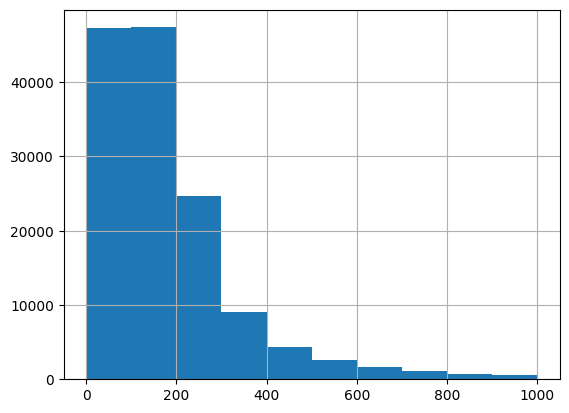

In [65]:
pd.Series(list_len).hist(range = [0, 1000])

# Saving

In [66]:
# Save structured_data_doc.json
with open(os.path.join("/home/drissdo/Desktop/Educational-Advisor-Chatbot/data", "structured_data_doc.json"), "w") as fOut:
    json.dump(data_doc, fOut, ensure_ascii=False)